# Aula/notebook para referencia: ML - Classificação por trás dos panos

Boas-vindas!

Você foi contratado(a) como cientista de dados pela operadora de telecomunicações Alura Voz. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de se reduzir a Taxa de Evasão de Clientes, conhecido como Churn Rate. Basicamente, o Churn Rate indica o quanto a empresa perdeu de receita ou clientes em um período de tempo.

Com sua experiência, você sugere, como passo inicial, a identificação de clientes que teriam uma maior chance de deixar a empresa. Para isso, você explica que é interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR estas pessoas como potenciais candidatas a deixar a empresa ou não.


Assim, você solicita o conjunto de dados para começar a explorar, tratar e modelar a partir de agora. Em seguida, o foco será na otimização de cada um dos modelos com a finalidade de obter o melhor resultado para a tomada de decisão da Alura Voz.

Por fim, você vai utilizar o GitHub e desenvolverá um portfólio focado em Data Science e Machine Learning.

[Desafio no Trello](https://trello.com/b/tG8jkTfb/challenge-ds-semana-1)

[Challenge Alura](https://www.alura.com.br/challenges/data-science/semana-01-primeiros-passos-data-science)

# Importando dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'

In [ ]:
dados = pd.read_json(uri)

## Dicionário dos dados

* customerID: número de identificação único de cada cliente
* Churn: se o cliente deixou ou não a empresa
* gender: gênero (masculino e feminino)
* SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* Partner: se o cliente possui ou não um parceiro ou parceira
* Dependents: se o cliente possui ou não dependentes
* tenure: meses de contrato do cliente
* PhoneService: assinatura de serviço telefônico
* MultipleLines: assisnatura de mais de uma linha de telefone
* InternetService: assinatura de um provedor internet
* OnlineSecurity: assinatura adicional de segurança online
* OnlineBackup: assinatura adicional de backup online
* DeviceProtection: assinatura adicional de proteção no dispositivo
* TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
* StreamingTV: assinatura de TV a cabo
* StreamingMovies: assinatura de streaming de filmes
* Contract: tipo de contrato
* PaperlessBilling: se o cliente prefere receber online a fatura
* PaymentMethod: forma de pagamento
* Charges.Monthly: total de todos os serviços do cliente por mês
* Charges.Total: total gasto pelo cliente

In [ ]:
dados.head(10)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Engenharia dos dados

## Transformando dicionários em variáveis

In [ ]:
customer = dados['customer'].apply(pd.Series)
phone = dados['phone'].apply(pd.Series)
internet = dados['internet'].apply(pd.Series)
account = dados['account'].apply(pd.Series)
charges = account['Charges'].apply(pd.Series)
churn = dados['Churn']

In [ ]:
customerID = pd.DataFrame(dados['customerID'])

In [ ]:
dataframe = customerID.join([customer, phone, internet, account, charges, churn])

In [ ]:
dataframe.drop(['Charges'], axis=1, inplace=True)

### DataFrame completo

In [ ]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


## Avaliando variáveis

In [ ]:
dataframe.Churn.value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

Existem 224 churn sem preenchimento. Vou separar este pessoal e utilizar o algoritimo para fazer a previsão no final do projeto.

In [ ]:
churn_vazios = dataframe[dataframe['Churn'] == ''].index
churn_vazios = dataframe.iloc[churn_vazios]
churn_vazios.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Churn
30,0047-ZHDTW,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3,
75,0120-YZLQA,Male,0,No,No,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1,
96,0154-QYHJU,Male,0,No,No,29,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,
98,0162-RZGMZ,Female,1,No,No,5,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,
175,0274-VVQOQ,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,


Substituindo strings vazias por NaN:

In [ ]:
dataframe['Churn'].replace('', np.nan, inplace=True)
dataframe['Total'].replace(' ', np.nan, inplace=True)

removendo 224 NaN referente a variável 'Churn' e 11 NaN referente a variável 'Total':

In [ ]:
dataframe.dropna(subset=['Churn', 'Total'], inplace=True)
dataframe.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### Features sem valores brancos ou NaN

In [ ]:
dataframe.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [ ]:
dataframe.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
dataframe.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
dataframe.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

## Transformação Binária dos dados

Separando variaveis quantitativas:

In [ ]:
quantitativas = dataframe[['tenure', 'Monthly', 'Total']].astype({'tenure' : 'int',
                                                                   'Monthly' : 'float',
                                                                   'Total' : 'float'})

In [ ]:
quantitativas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tenure   7032 non-null   int64  
 1   Monthly  7032 non-null   float64
 2   Total    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 219.8 KB


### Separação binária:

In [ ]:
dummy_df = pd.get_dummies(dataframe.drop(['customerID', 'tenure', 'Monthly', 'Total'], axis=1))

Removendo redundância:

In [ ]:
dummy_df.drop(['gender_Female', 
               'Partner_No', 
               'PhoneService_No',
               'MultipleLines_No',
               'MultipleLines_No phone service',
               'InternetService_No',
               'OnlineSecurity_No',
               'OnlineSecurity_No internet service',
               'OnlineBackup_No',
               'OnlineBackup_No internet service',
               'DeviceProtection_No',
               'DeviceProtection_No internet service',
               'TechSupport_No',
               'TechSupport_No internet service',
               'StreamingTV_No',
               'StreamingTV_No internet service',
               'StreamingMovies_No',
               'StreamingMovies_No internet service',
               'Dependents_No', 
               'PaperlessBilling_No', 
               'Churn_No'],
              axis=1,
              inplace=True)

devolvendo variaveis quantitativas ao dataset:

In [ ]:
dummy_df = dummy_df.join([quantitativas])

Renomeando variáveis:

In [ ]:
dummy_df = dummy_df.rename(columns = {'SeniorCitizen' : 'maior65',
                                      'gender_Male' : 'sexo_masculino',
                                      'Partner_Yes' : 'conjuge',
                                      'Dependents_Yes' : 'dependentes',
                                      'PhoneService_Yes' : 'telefone_fixo',
                                      'MultipleLines_Yes' : 'multiplas_linhas',
                                      'InternetService_DSL' : 'DSL',
                                      'InternetService_Fiber optic' : 'fibra_optica',
                                      'OnlineSecurity_Yes' : 'seguranca_online',
                                      'OnlineBackup_Yes' : 'bkp_online',
                                      'DeviceProtection_Yes' : 'seguro_aparelho',
                                      'TechSupport_Yes' : 'suporte_tecnico',
                                      'StreamingTV_Yes' : 'streaming_tv',
                                      'StreamingMovies_Yes' : 'streaming_filmes',
                                      'Contract_Month-to-month' : 'contrato_por_mes',
                                      'Contract_One year' : 'contrato_por_ano',
                                      'Contract_Two year' : 'contrato_por_2anos',
                                      'PaperlessBilling_Yes' : 'conta_digital',
                                      'PaymentMethod_Bank transfer (automatic)' : 'transferencia_bancaria_auto',
                                      'PaymentMethod_Credit card (automatic)' : 'cartao_credito_auto',
                                      'PaymentMethod_Electronic check' : 'cheque_eletronico',
                                      'PaymentMethod_Mailed check' : 'cheque_correio',
                                      'Churn_Yes' : 'churn',
                                      'tenure' : 'meses_de_contrato',
                                      'Monthly' : 'valor_mensal',
                                      'Total' : 'total_gasto'})

In [ ]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maior65                      7032 non-null   int64  
 1   sexo_masculino               7032 non-null   uint8  
 2   conjuge                      7032 non-null   uint8  
 3   dependentes                  7032 non-null   uint8  
 4   telefone_fixo                7032 non-null   uint8  
 5   multiplas_linhas             7032 non-null   uint8  
 6   DSL                          7032 non-null   uint8  
 7   fibra_optica                 7032 non-null   uint8  
 8   seguranca_online             7032 non-null   uint8  
 9   bkp_online                   7032 non-null   uint8  
 10  seguro_aparelho              7032 non-null   uint8  
 11  suporte_tecnico              7032 non-null   uint8  
 12  streaming_tv                 7032 non-null   uint8  
 13  streaming_filmes  

## Definindo features e labels:

In [ ]:
features = dummy_df.drop(['churn'], axis = 1)
churn_label = dummy_df[['churn']]

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   maior65                      7032 non-null   int64  
 1   sexo_masculino               7032 non-null   uint8  
 2   conjuge                      7032 non-null   uint8  
 3   dependentes                  7032 non-null   uint8  
 4   telefone_fixo                7032 non-null   uint8  
 5   multiplas_linhas             7032 non-null   uint8  
 6   DSL                          7032 non-null   uint8  
 7   fibra_optica                 7032 non-null   uint8  
 8   seguranca_online             7032 non-null   uint8  
 9   bkp_online                   7032 non-null   uint8  
 10  seguro_aparelho              7032 non-null   uint8  
 11  suporte_tecnico              7032 non-null   uint8  
 12  streaming_tv                 7032 non-null   uint8  
 13  streaming_filmes  

In [ ]:
churn_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   churn   7032 non-null   uint8
dtypes: uint8(1)
memory usage: 319.8 KB


## Avaliando desbalanceamento dos dados

In [ ]:
churn_label.value_counts()

churn
0        5163
1        1869
dtype: int64

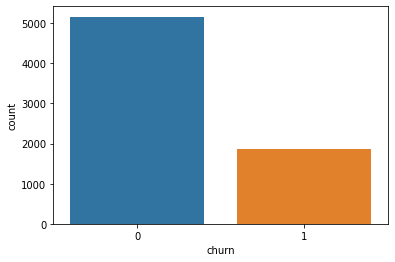

In [ ]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='churn', data=churn_label)

Aplicando oversampling para balanceamento da variável-alvo:

In [ ]:
from pandas.core.common import random_state
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 0
np.random.seed(SEED)

x = features
y = churn_label

smote = SMOTE(random_state = SEED)
x, y = smote.fit_resample(x, y)

dados_balanceados = pd.concat([x, y], axis=1)

In [ ]:
dados_balanceados.head()

,maior65,sexo_masculino,conjuge,dependentes,telefone_fixo,multiplas_linhas,DSL,fibra_optica,seguranca_online,bkp_online,...,contrato_por_2anos,conta_digital,transferencia_bancaria_auto,cartao_credito_auto,cheque_eletronico,cheque_correio,meses_de_contrato,valor_mensal,total_gasto,churn
0,0,0,1,1,1,0,1,0,0,1,...,0,1,0,0,0,1,9,65.6,593.30,0
1,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,1,9,59.9,542.40,0
2,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,4,73.9,280.85,1
3,1,1,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,13,98.0,1237.85,1
4,1,0,1,0,1,0,0,1,0,0,...,0,1,0,0,0,1,3,83.9,267.40,1


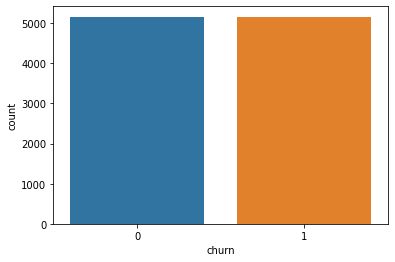

In [ ]:
ax = sns.countplot(x='churn', data=dados_balanceados)

In [ ]:
x.head()

,maior65,sexo_masculino,conjuge,dependentes,telefone_fixo,multiplas_linhas,DSL,fibra_optica,seguranca_online,bkp_online,...,contrato_por_ano,contrato_por_2anos,conta_digital,transferencia_bancaria_auto,cartao_credito_auto,cheque_eletronico,cheque_correio,meses_de_contrato,valor_mensal,total_gasto
0,0,0,1,1,1,0,1,0,0,1,...,1,0,1,0,0,0,1,9,65.6,593.30
1,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,9,59.9,542.40
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,4,73.9,280.85
3,1,1,1,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,13,98.0,1237.85
4,1,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,3,83.9,267.40


In [ ]:
y.head()

,churn
0,0
1,0
2,1
3,1
4,1


# MACHINE LEARNING

## Tecnicas para experimentar

Separadores de treino e teste:
* train_test_split (TTS)
* cross_validate (CV)
* KFold (KF)

Classificadores:
* K-nearest neighbors (KNN)
* DummyClassifier(dummy)
* DecisionTreeClassifier (DTC)
* RandomForestClassifier (RFC)
* SVC
* Bernoulli Naive Bayes (BNB)


Aavaliadores:
* accuracy
* recall

Selecionador de melhores variaveis
* Select K-best
* RFE
* RFECV (cross validation)

## Padronizando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler

normalizador = StandardScaler()

x_normalizado = normalizador.fit_transform(x)
x_normalizado

array([[-0.39930323, -0.86543847,  1.28124795, ..., -0.77924776,
        -0.09223783, -0.66687441],
       [-0.39930323,  1.15548365, -0.78048905, ..., -0.77924776,
        -0.29108112, -0.69017602],
       [-0.39930323,  1.15548365, -0.78048905, ..., -0.98782659,
         0.1973059 , -0.8099115 ],
       ...,
       [-0.39930323, -0.86543847,  1.28124795, ..., -1.11297389,
        -1.67918453, -0.92927666],
       [ 2.50436239,  1.15548365, -0.78048905, ..., -0.11179551,
         1.07489496,  0.20773822],
       [-0.39930323, -0.86543847, -0.78048905, ..., -0.02836397,
         0.57808386,  0.10302608]])

In [ ]:
y = y.squeeze()

In [ ]:
type(y)

pandas.core.series.Series

## Importações dos modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

## SEED

In [ ]:
SEED = 0
np.random.seed(SEED)

## Train Test Split

In [ ]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x_normalizado,
                                                        y,
                                                        test_size=0.3,
                                                        random_state = SEED)

## Testando multiplos modelos de ML

Listas com dicionários contendo os parâmetros à experimentar:

In [ ]:
LR_params = [{'C':0.01}, 
             {'C':0.1}, 
             {'C':1}, 
             {'C':10}]

DTC_params = [{'criterion': 'gini'}, 
              {'criterion': 'entropy'}, 
              {'max_depth': 2},
              {'max_depth': 3},
              {'max_depth': 5},
              {'max_depth': 10}]

RFC_params = [{'criterion': 'gini'}, 
              {'criterion': 'entropy'},
              {'max_depth': 2},
              {'max_depth': 3},
              {'max_depth': 5},
              {'max_depth': 10}]

KNN_params = [{'n_neighbors':3}, 
              {'n_neighbors':5}]

BNB_params = [{'binarize':(np.median(treino_x))}]

SVC_params = [{'C':0.01}, 
              {'C':0.1}, 
              {'C':1}, 
              {'C':10}]

Lista bidimensional contendo uma string com o nome, a sintaxe do modelo e a lista/dicionário com parâmetros.

In [ ]:
lista_modelos = [
    ['Linear Regression', LogisticRegression, LR_params],
    ['Decision Tree', DecisionTreeClassifier, DTC_params],
    ['Random Forest', RandomForestClassifier, RFC_params],
    ['K-neighbors', KNeighborsClassifier, KNN_params],
    ['Bernoulli-Naive Bayes', BernoulliNB, BNB_params],
    ['Support Vector Machines', SVC, SVC_params]
]

Célula que fará os testes e agrupará os resultados em uma lista.

In [ ]:
SEED = 0
np.random.seed(SEED)

resultados = []

for string_modelo, sintaxe_modelo, lista_parametros in lista_modelos:
    for parametro in lista_parametros:
        modelo = sintaxe_modelo(**parametro)
        modelo.fit(treino_x, treino_y)
        score = modelo.score(teste_x, teste_y) * 100
        resultados.append((string_modelo, sintaxe_modelo, parametro, score.round(2)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Impressão dos resultados:

Função lambda:

```
def x():
  return x[-1]
```
retorna a lista de trás pra frente (score em primeiro.
Reverse=True decrescente.


In [ ]:
resultados.sort(key=lambda x:x[-1], reverse=True)

for modelname, model, params, score in resultados:
    print(modelname, params, score)

Random Forest {'criterion': 'entropy'} 85.54
Random Forest {'criterion': 'gini'} 85.09
Linear Regression {'C': 1} 84.99
Linear Regression {'C': 10} 84.76
Linear Regression {'C': 0.1} 84.41
Support Vector Machines {'C': 1} 84.15
Random Forest {'max_depth': 10} 84.12
Linear Regression {'C': 0.01} 83.54
Support Vector Machines {'C': 10} 83.44
Support Vector Machines {'C': 0.1} 83.09
Decision Tree {'max_depth': 10} 82.47
K-neighbors {'n_neighbors': 3} 81.86
Random Forest {'max_depth': 5} 81.76
K-neighbors {'n_neighbors': 5} 81.67
Decision Tree {'criterion': 'entropy'} 81.25
Support Vector Machines {'C': 0.01} 81.08
Decision Tree {'criterion': 'gini'} 80.79
Decision Tree {'max_depth': 5} 80.57
Decision Tree {'max_depth': 3} 78.5
Random Forest {'max_depth': 3} 77.86
Bernoulli-Naive Bayes {'binarize': -0.44409164741565205} 76.92
Random Forest {'max_depth': 2} 75.44
Decision Tree {'max_depth': 2} 70.85


## Utilizando GridSearchCV

In [ ]:
# GridSearchCV DTC

from sklearn.model_selection import GridSearchCV, KFold

SEED = 0
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(RandomForestClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits=10))

busca.fit(x, y)

resultados = pd.DataFrame(busca.cv_results_)
# resultados.head()

In [ ]:
busca.best_score_

0.7924935463052597

In [ ]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 32,
 'min_samples_split': 64}

In [ ]:
# GridSearchCV RFC

from sklearn.model_selection import GridSearchCV, KFold

SEED = 0
np.random.seed(SEED)

espaco_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaco_de_parametros,
                     cv = KFold(n_splits=10))

busca.fit(x, y)

resultados = pd.DataFrame(busca.cv_results_)
# resultados.head()

In [ ]:
busca.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 128,
 'min_samples_split': 32}

In [ ]:
busca.best_score_

0.7852285433410627

# Estimadores

## Dummy Classifier

In [ ]:
def classificar_dummy(x):

  classificador_dummy = DummyClassifier(strategy='most_frequent')
  classificador_dummy.fit(treino_x, treino_y)

  print(f'Acurácia dummy/TTS: {classificador_dummy.score(teste_x, teste_y) * 100 :.2f}%')
  

In [ ]:
classificar_dummy(x_normalizado)

Acurácia dummy/TTS: 49.13%


## K-nearest Neighbors com Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

def classificar_KNN_TTS(x):
  SEED = 0
  np.random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                          test_size=0.3,
                                                          random_state = SEED)
  
  classificador_KNN = KNeighborsClassifier(metric='euclidean')
  classificador_KNN.fit(treino_x, treino_y)

  predito_knn = classificador_KNN.predict(teste_x)

  print(f'Acurácia KNN/TTS: {classificador_KNN.score(teste_x, teste_y) * 100 :.2f}%')
  

In [ ]:
classificar_KNN_TTS(x_normalizado)

Acurácia KNN/TTS: 81.67%


## Bernoulli Naive Bayes com Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import numpy as np

def classificar_BNB_TTS(x):
  SEED = 0
  np.random.seed(SEED)

  mediana = np.median(x)

  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                          test_size=0.3,
                                                          random_state = SEED)
  
  classificador_BNB = BernoulliNB(binarize=mediana)
  classificador_BNB.fit(treino_x, treino_y)

  print(f'Acurácia BNB/TTS: {classificador_BNB.score(teste_x, teste_y) * 100 :.2f}%')
  

In [ ]:
classificar_BNB_TTS(x_normalizado)

Acurácia BNB/TTS: 76.92%


## Decision Tree Classifier com Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def classificar_DTC_TTS(x):
  SEED = 0
  np.random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                          test_size=0.3,
                                                          random_state = SEED)
  
  classificador_DTC = DecisionTreeClassifier(criterion='entropy',
                                             max_depth = 10,
                                             random_state=SEED)
  classificador_DTC.fit(treino_x, treino_y)

  print(f'Acurácia DTC/TTS: {classificador_DTC.score(teste_x, teste_y) * 100 :.2f}%')


In [ ]:
classificar_DTC_TTS(x_normalizado)

Acurácia DTC/TTS: 81.63%


## Random Forest Classifier com Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def classificar_RFC_TTS(x):
  SEED = 0
  np.random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                          test_size=0.3,
                                                          random_state = SEED)
  
  classificador_RFC = RandomForestClassifier(n_estimators=100)
  classificador_RFC.fit(treino_x, treino_y)

  print(f'Acurácia RFC/TTS: {classificador_RFC.score(teste_x, teste_y) * 100 :.2f}%')
  

In [ ]:
classificar_RFC_TTS(x_normalizado)

Acurácia RFC/TTS: 85.41%


## SVC com Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

def classificar_SVC_TTS(x):
  SEED = 0
  np.random.seed(SEED)

  treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                          test_size=0.3,
                                                          random_state = SEED)
  
  classificador_SVC = SVC(gamma='auto')
  classificador_SVC.fit(treino_x, treino_y)

  print(f'Acurácia SVC/TTS: {classificador_SVC.score(teste_x, teste_y) * 100 :.2f}%')
  

In [ ]:
classificar_SVC_TTS(x_normalizado)

Acurácia SVC/TTS: 84.09%
